In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
from copy import deepcopy
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DRIVE_PATH = os.path.join("./drive", "MyDrive", "cs3244-pg26")
PROCESSED_DATA_PATH = os.path.join("data_processed", "resale_flat_prices")
SEED = 42

In [4]:
df = pd.read_csv(os.path.join(DRIVE_PATH, PROCESSED_DATA_PATH, "engineered_data.csv"))
df.head(10)

,Unnamed: 0,town,flat_type,flat_model,sale_date,floor,age,relative_tenure,floor_area,psm,...,nearest_libraries,nearest_hawkers,nearest_stores,nearest_post_offices,nearest_bus_stops,nearest_pharmacies,nearest_primary_schools,nearest_parks,nearest_trains,sale_month
0,0,JURONG_WEST,3_ROOM,IMPROVED,1990-01-01,5.0,16,0.899953,70.0,334.285714,...,0.751719,0.576328,0.521140,0.798752,0.195397,0.761661,0.541789,0.947906,0.904104,1
1,1,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,14.0,15,0.902280,65.0,692.307692,...,1.586201,0.223202,0.227558,0.690789,0.083148,0.637859,0.507003,0.406147,1.175060,1
2,2,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,8.0,17,0.897563,76.0,684.210526,...,2.275297,0.280489,0.258324,0.887844,0.947314,0.327928,0.184706,0.314143,0.358770,1
3,3,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,2.0,15,0.902280,76.0,671.052632,...,1.586201,0.223202,0.227558,0.690789,0.083148,0.637859,0.507003,0.406147,1.175060,1
4,4,OTHER,5_ROOM,STANDARD,1990-01-01,5.0,15,0.902280,120.0,916.666667,...,0.930882,0.290215,0.368291,3.042559,0.090376,1.133326,0.159056,0.330270,1.954674,1
5,5,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,5.0,15,0.902280,63.0,722.222222,...,1.399324,0.165177,0.047929,1.148847,0.446105,0.850333,0.943485,0.737703,0.932695,1
6,6,BUKIT_MERAH,OTHER,IMPROVED,1990-01-01,8.0,21,0.887322,29.0,251.724138,...,1.585636,0.148977,0.248726,1.294327,1.620819,0.431442,0.691163,0.311404,0.448964,1
7,7,BUKIT_MERAH,OTHER,IMPROVED,1990-01-01,11.0,21,0.887322,29.0,251.724138,...,1.585636,0.148977,0.248726,1.294327,1.620819,0.431442,0.691163,0.311404,0.448964,1
8,8,BUKIT_MERAH,OTHER,IMPROVED,1990-01-01,8.0,21,0.887322,29.0,310.344828,...,1.585636,0.148977,0.248726,1.294327,1.620819,0.431442,0.691163,0.311404,0.448964,1
9,9,BUKIT_MERAH,3_ROOM,IMPROVED,1990-01-01,14.0,15,0.902280,65.0,692.307692,...,1.559074,0.441532,0.432699,0.868920,0.289260,0.797602,0.345003,0.565509,1.059552,1


In [5]:
def process_df(df):
  new_df = deepcopy(df)
  new_df.drop(columns=["Unnamed: 0", "sale_date", "address", "latitude_rad", "longitude_rad", "latitude", "longitude"], inplace=True)
  new_df = pd.get_dummies(new_df, columns=["flat_type", "flat_model", "town"], dummy_na = True, dtype=np.uint8)
  new_df.drop(columns=["town_nan", "flat_type_nan", "flat_model_nan"], inplace=True)
  return new_df



In [6]:
new_df = process_df(df)

In [7]:
new_df.columns

Index(['floor', 'age', 'relative_tenure', 'floor_area', 'psm', 'nearest_atm',
       'nearest_libraries', 'nearest_hawkers', 'nearest_stores',
       'nearest_post_offices', 'nearest_bus_stops', 'nearest_pharmacies',
       'nearest_primary_schools', 'nearest_parks', 'nearest_trains',
       'sale_month', 'flat_type_3_ROOM', 'flat_type_4_ROOM',
       'flat_type_5_ROOM', 'flat_type_EXECUTIVE', 'flat_type_OTHER',
       'flat_model_APARTMENT', 'flat_model_IMPROVED', 'flat_model_MAISONETTE',
       'flat_model_MODEL_A', 'flat_model_MODEL_A2',
       'flat_model_NEW_GENERATION', 'flat_model_OTHER',
       'flat_model_PREMIUM_APARTMENT', 'flat_model_SIMPLIFIED',
       'flat_model_STANDARD', 'town_ANG_MO_KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT_BATOK', 'town_BUKIT_MERAH', 'town_BUKIT_PANJANG',
       'town_CHOA_CHU_KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG_EAST', 'town_JURONG_WEST', 'town_KALLANG/WHAMPOA',
       'town_OTHER', 'town_PASIR_RIS'

In [8]:
from sklearn.model_selection import train_test_split

X = new_df[new_df.columns.difference(["psm"])]
y = new_df["psm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = SEED)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(54, activation="relu", input_shape=(54,)),
  tf.keras.layers.Dense(108, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation="linear")
])

In [14]:
model.compile(loss="mse", optimizer="rmsprop", metrics=["mse", "mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 54)                2970      
                                                                 
 dense_4 (Dense)             (None, 108)               5940      
                                                                 
 dropout_1 (Dropout)         (None, 108)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 109       
                                                                 
Total params: 9,019
Trainable params: 9,019
Non-trainable params: 0
_________________________________________________________________


In [15]:
checkpoint_path = "model_checkpoints/cp-{epoch:04d}.ckpt"

batch_size = 1024

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(DRIVE_PATH, checkpoint_path), 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

model.save_weights(checkpoint_path.format(epoch=0))

In [16]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs=2000, validation_split=0.16667, shuffle=True, callbacks=[cp_callback], verbose=1)

Epoch 1/2000
635/635 [==============================] - 4s 5ms/step - loss: 2080099.8750 - mse: 2080099.8750 - mae: 1014.8318 - val_loss: 730192.0625 - val_mse: 730192.0625 - val_mae: 621.1773
Epoch 2/2000
635/635 [==============================] - 3s 4ms/step - loss: 896763.1250 - mse: 896763.1250 - mae: 707.5197 - val_loss: 536126.1250 - val_mse: 536126.1250 - val_mae: 538.2084
Epoch 3/2000
635/635 [==============================] - 3s 4ms/step - loss: 722022.3750 - mse: 722022.3750 - mae: 630.4820 - val_loss: 499522.5625 - val_mse: 499522.5625 - val_mae: 480.4508
Epoch 4/2000
635/635 [==============================] - 3s 4ms/step - loss: 632427.0625 - mse: 632427.0625 - mae: 591.3929 - val_loss: 342038.6250 - val_mse: 342038.6250 - val_mae: 432.7698
Epoch 5/2000
635/635 [==============================] - 3s 4ms/step - loss: 583120.7500 - mse: 583120.7500 - mae: 566.8017 - val_loss: 313955.6562 - val_mse: 313955.6562 - val_mae: 420.2152
Epoch 6/2000
635/635 [=========================

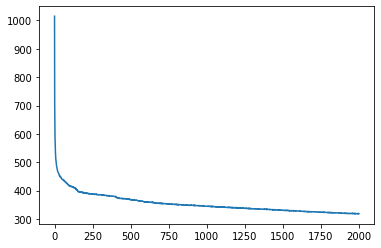

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history["mae"])  
plt.show()

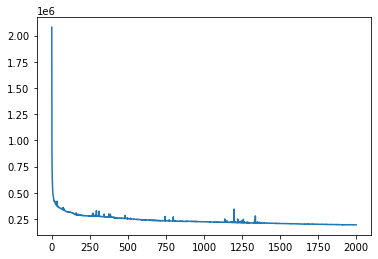

In [18]:
plt.plot(history.history["mse"])
plt.show()

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_absolute_percentage_error
print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

0.9436377179754812
202.91153000567505
0.9405327793551719
0.07492249080266829


In [21]:
y_pred_reshaped = np.reshape(y_pred, -1)
y_pred_series = pd.Series(y_pred_reshaped, name="y_pred")

test_df = X_test.merge(y_test, left_index=True, right_index=True)
test_pred_df = test_df.merge(y_pred_series, left_index = True, right_index = True)


In [22]:
test_pred_df.head(20)

,age,flat_model_APARTMENT,flat_model_IMPROVED,flat_model_MAISONETTE,flat_model_MODEL_A,flat_model_MODEL_A2,flat_model_NEW_GENERATION,flat_model_OTHER,flat_model_PREMIUM_APARTMENT,flat_model_SIMPLIFIED,...,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA_PAYOH,town_WOODLANDS,town_YISHUN,psm,y_pred
29583,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,934.579439,2470.127930
7422,6,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,579.710145,5288.693848
20432,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1217.557252,2091.863525
33044,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,538.461538,4818.892090
27440,25,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,615.384615,7833.490234
78086,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1375.000000,2165.868164
24773,20,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,681.355932,3071.638428
66119,14,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1902.173913,1080.662354
60535,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1742.424242,3997.395020
59148,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1310.810811,4490.955078


In [23]:
test_pred_df.to_csv(os.path.join(DRIVE_PATH, PROCESSED_DATA_PATH, "test_pred_df.csv"))

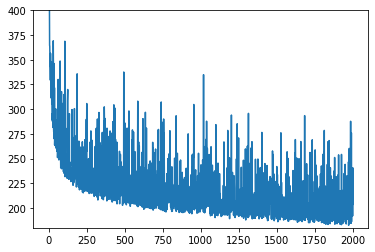

In [37]:
plt.subplot(111)
plt.plot(history.history["val_mae"])
plt.ylim(180, 400)
plt.show()

In [28]:
pd.DataFrame.from_dict(history.history).to_csv(os.path.join(DRIVE_PATH, PROCESSED_DATA_PATH, 'history.csv'),index=False)

In [29]:
model.save(os.path.join(DRIVE_PATH, PROCESSED_DATA_PATH, "model_v1.h5"))